## Introduction to Problem & Data

In [14]:
df['day_of_week'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()
df['hour'] = df['start_time'].dt.hour

# Filter to top 50 busiest start stations
top_50_stations = df['start_station_name'].value_counts().head(50).index
df_filtered = df[df['start_station_name'].isin(top_50_stations)].copy()


# Models & Methods: Exploratory Analysis

I began by visualizing the top 20 Start Stations with the highest volume of trips to identify which Citi Bike locations experience the highest volume of departures on this Saturday.









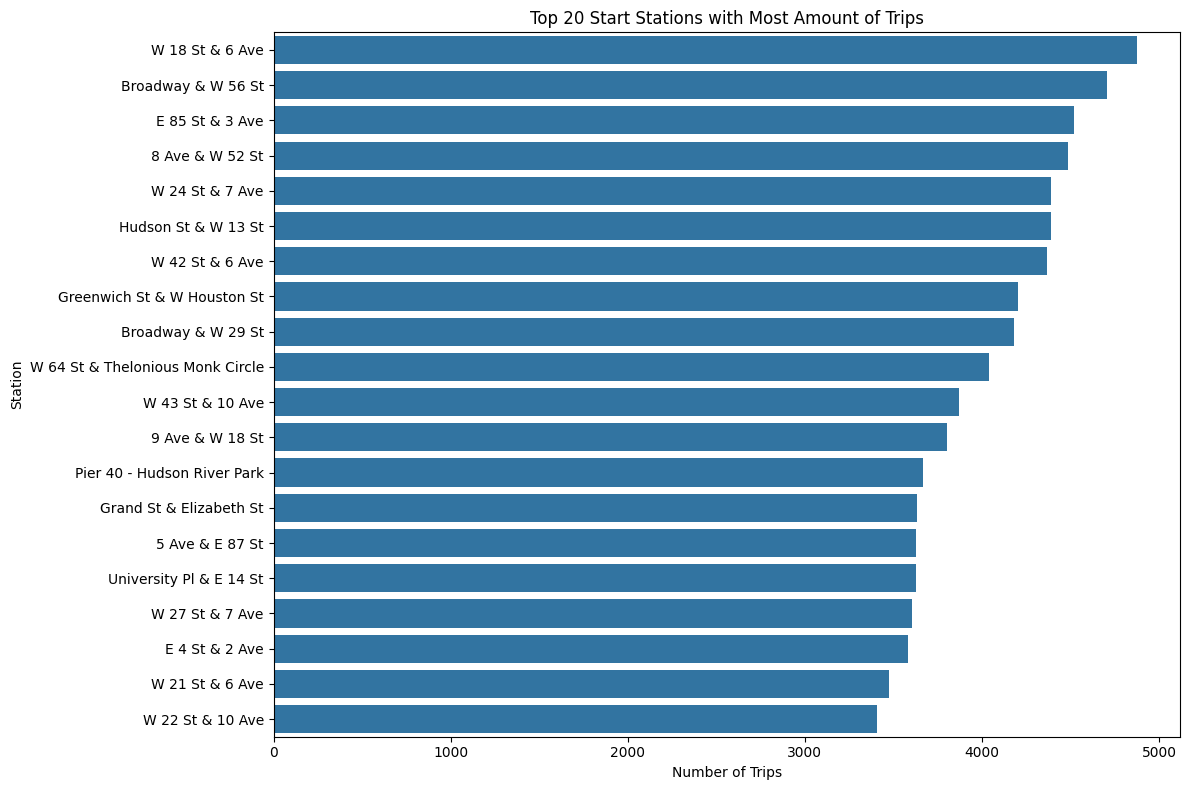

In [15]:
# Create top 20 start station DataFrame
top_20_df = df_filtered['start_station_name'].value_counts().head(20).reset_index()
top_20_df.columns = ['Station', 'Trip Count']


plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_df, x='Trip Count', y='Station')
plt.title('Top 20 Start Stations with Most Amount of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Station')
plt.tight_layout()
plt.show()


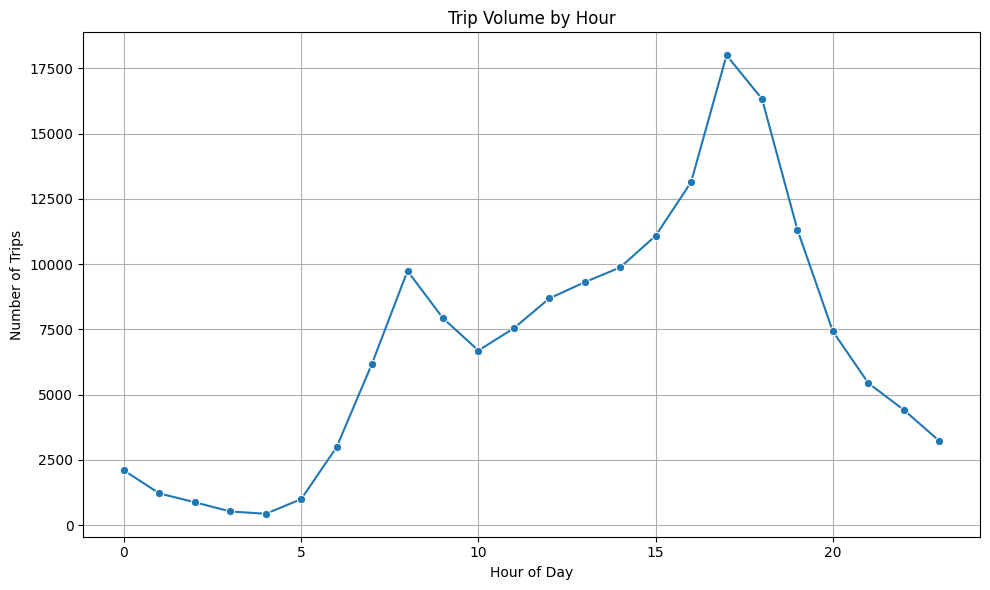

In [16]:
hourly_counts = df_filtered['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Trip Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.savefig('trip_volume_by_hour_saturday.png')
plt.show()


This scatterplot illustrates the relationship between trip duration and time of day, helping understand when riders tend to take longer or shorter rides. By filtering out extreme outliers, we can observe that most rides are clustered below 1,000 seconds (around 15–20 minutes), with occasional longer trips throughout the day.

<ipython-input-17-8f54618b1d94>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['end_time'] = pd.to_datetime(df_filtered['end_time'], errors='coerce')


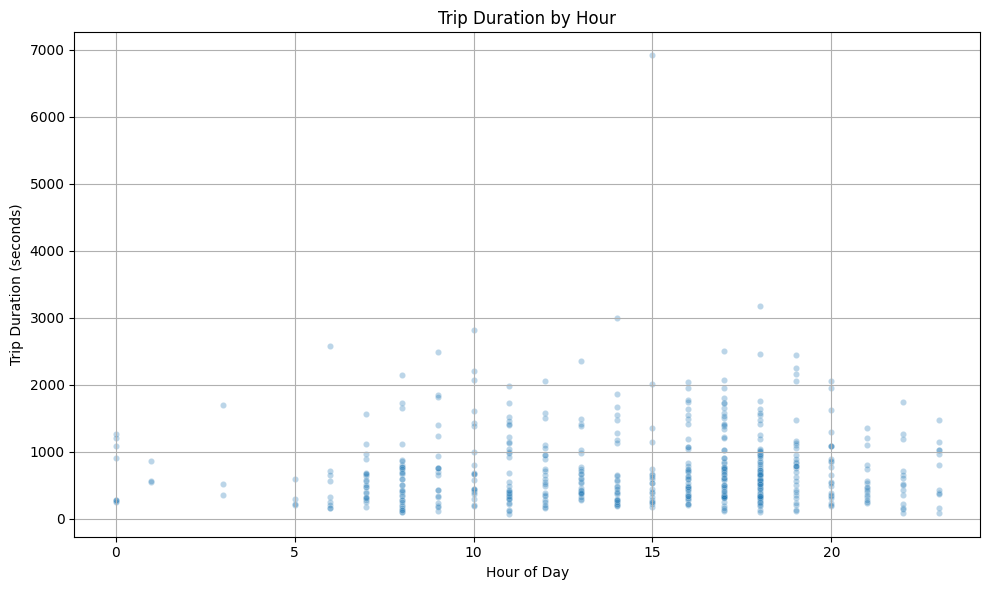

In [17]:
# Convert times
df_filtered['start_time'] = pd.to_datetime(df_filtered['start_time'], errors='coerce')
df_filtered['end_time'] = pd.to_datetime(df_filtered['end_time'], errors='coerce')

# Create trip duration in seconds
df_filtered['tripduration'] = (df_filtered['end_time'] - df_filtered['start_time']).dt.total_seconds()

# Keep only valid durations  (0 < duration < 7200 seconds = 2 hours)
df_valid = df_filtered[(df_filtered['tripduration'] > 0) & (df_filtered['tripduration'] < 7200)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid.sample(500), x='hour', y='tripduration', alpha=0.3, s=20)
plt.title('Trip Duration by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration (seconds)')
plt.grid(True)
plt.tight_layout()
plt.savefig('tripduration_by_hour_scatter_cleaned.png')
plt.show()


This graph displays the Top 15 End Stations, providing insight into where Citi Bike riders most frequently conclude their trips. Analyzing end-station popularity complements the understanding of start-station demand and helps identify high-traffic drop-off locations, which are crucial for planning rebalancing efforts and docking station capacity. By pairing this with start station and time-of-day data, we can build a more complete picture of bike flow patterns.

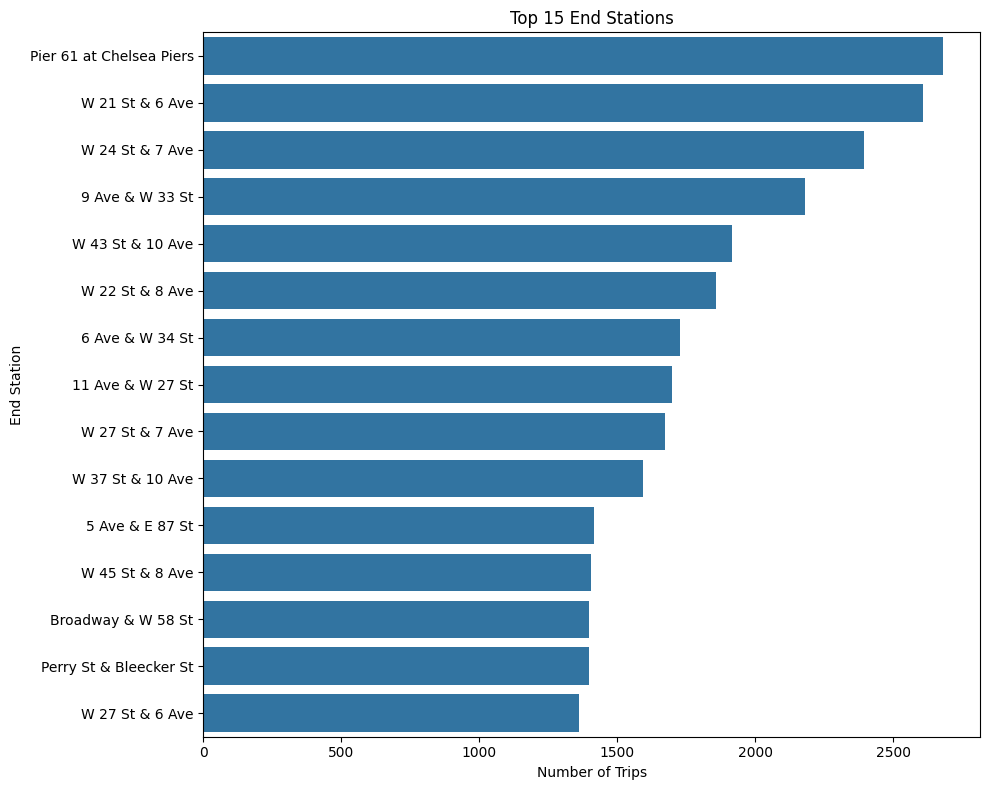

In [18]:
top_end_stations = df_filtered['end_station_name'].value_counts().head(15)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_end_stations.index, x=top_end_stations.values)
plt.title('Top 15 End Stations')
plt.xlabel('Number of Trips')
plt.ylabel('End Station')
plt.tight_layout()
plt.show()


## Next Steps & Discussion

# Key Findings

# Next Steps